In [89]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city=pd.read_csv(city_data_to_load)
ride=pd.read_csv(ride_data_to_load)
city.head()


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [90]:
ride.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [91]:
# Combine the data into a single dataset
combined_data = pd.merge(city, ride,on="city")

# Display the data table for preview
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


# Bubble Plot of Ride Sharing Data

In [92]:
# Obtain the x and y coordinates for each of the three city types
#Calculations for each city type - generate series for average fare, total rides and total drivers 
#avg_fare
group_city =combined_data.groupby("city")
avg_fare = group_city.mean()["fare"]
#total_rides
total_rides = group_city.count()["ride_id"]
#total_drivers
total_drivers = group_city.count()["driver_count"]
#set city as index in the city(city data) set for the city type 
new_city = city.set_index("city")["type"]
#check the different values of the city_new set by value_counts
#new_city.value_counts()
#Create DF for all the above 3 along with the city type
final_df = pd.DataFrame({"Average Fare":avg_fare,"Total Rides":total_rides,"Total Drivers":total_drivers,"City Type":new_city})
final_df.head()


,Average Fare,Total Rides,Total Drivers,City Type
Amandaburgh,24.641667,18,18,Urban
Barajasview,25.332273,22,22,Urban
Barronchester,36.422500,16,16,Suburban
Bethanyland,32.956111,18,18,Suburban
Bradshawfurt,40.064000,10,10,Rural


In [93]:
# for each city type- urban, suburban and rural
uc = final_df.loc[final_df["City Type"]=="Urban"]
#uc
suc = final_df.loc[final_df["City Type"]=="Suburban"]
#suc
rc = final_df.loc[final_df["City Type"]=="Rural"]
#rc

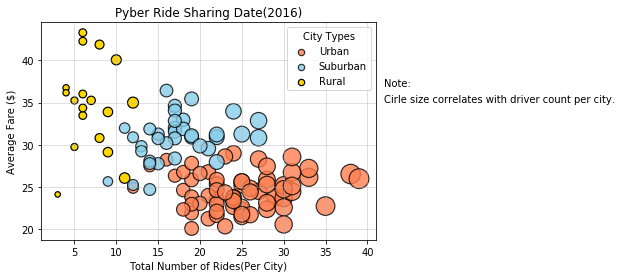

In [94]:
# Build the scatter plots for each city types

ax = uc.plot(kind = "scatter", x = "Total Rides", y ="Average Fare", c ='coral',s = uc["Total Drivers"]*10 , grid = True, label = "Urban",edgecolors="black",alpha =.8,linewidths =1.2)
ax1=suc.plot(kind = "scatter", x = "Total Rides", y ="Average Fare", c ='skyblue',alpha=.8,edgecolors="black",linewidths =1.2,
                     s = suc["Total Drivers"]*10  , grid = True, title = "Pyber Ride Sharing Date(2016)",label = "Suburban", ax=ax)
ax2=rc.plot(kind = "scatter", x = "Total Rides", y ="Average Fare", c ='Gold',edgecolors="black",linewidths =1.2,
                     s = rc["Total Drivers"]*10  , grid = True, label ='Rural',ax=ax)

# Incorporate the other graph properties

plt.ylim(18.75, 44.5)
plt.xlim(1,41)
plt.grid(axis='both', alpha=0.5)
ax.set_xlabel("Total Number of Rides(Per City)")
ax.set_ylabel("Average Fare ($)")

# Create a legend

legend = plt.legend(title = "City Types")
for handles in legend.legendHandles:
    handles.set_sizes([40])
    
# Incorporate a text label regarding circle size
ax.text(42,37,"Note:")
ax.text(42,35,"Cirle size correlates with driver count per city.")

# Save Figure

plt.savefig("pyber_scatter_plot.png", bbox_inches="tight")

In [95]:
# Show plot
plt.show()

# Total Fares by City Type

Text(0.5, 1.0, '% of Total Fares by City Type')

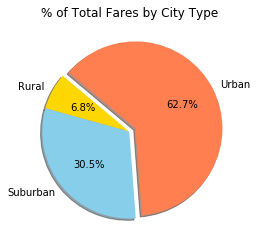

In [96]:
# Calculate Driver Percents
# total Fares
total_fares = combined_data["fare"].sum()
# fares per type
groupedby_type = combined_data.groupby("type")
fares_per_type = groupedby_type.fare.sum()
percent_fares_per_type = (fares_per_type * 100) / total_fares


# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [6.8, 30.5, 62.7]

# The colors of each section of the pie chart
colors = ["gold", "skyblue", "coral"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.08)
# Save Figure
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.savefig("pyber_pie_total_fares_per_type.png")

# Title
plt.title('% of Total Fares by City Type')


In [97]:
# Show Figure
plt.show()

#  Total Rides by City Type

Text(0.5, 1.0, '% of Total Rides by City Type')

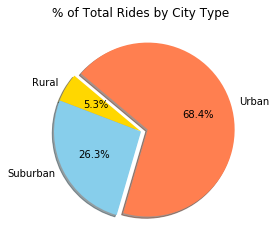

In [98]:
# Calculate Type Percents
# total rides
total_rides = combined_data['ride_id'].count()
# rides per type
groupedby_type = combined_data.groupby('type')
rides_per_type = groupedby_type.ride_id.count()
percent_rides_per_type = (rides_per_type * 100) / total_rides


# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [5.3, 26.3, 68.4]

# The colors of each section of the pie chart
colors = ["gold", "skyblue", "coral"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.08)

# Save Figure
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.savefig("pyber_pie_total_rides_per_type.png")

# Title
plt.title('% of Total Rides by City Type')

In [99]:
# Show Figure
plt.show()

#  Total Drivers by City Type

Text(0.5, 1.0, '% of Total Drivers by City Type')

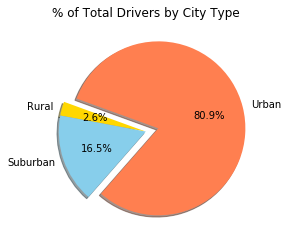

In [100]:
# drivers per type
rural_drivers = rc['Total Drivers'].sum()
suburban_drivers = suc['Total Drivers'].sum()
urban_drivers = uc['Total Drivers'].sum()

# total drivers
total_drivers = rural_drivers + suburban_drivers + urban_drivers

rural_rides_percent = (rural_drivers * 100) / total_drivers
suburban_rides_percent = (suburban_drivers * 100) / total_drivers
urban_rides_percent = (urban_drivers * 100) / total_drivers

# Build Pie Charts
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [2.6, 16.5, 80.9]

# The colors of each section of the pie chart
colors = ["gold", "skyblue", "coral"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.15)

# Save Figure
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)

plt.savefig("pyber_pie_total_drivers_per_type.png")

# Title
plt.title('% of Total Drivers by City Type')

In [84]:
# Show Figure
plt.show()